In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\santu\\OneDrive\\Desktop\\PROJECT FLIP ROBO\\titanic_train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.drop(columns=['Cabin'],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [7]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [8]:
df['Embarked'].fillna('S',inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [9]:
df_age=np.random.randint(df['Age'].mean()-df['Age'].std(),df['Age'].mean() + df['Age'].std(),177)

In [10]:
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [11]:
df['Age'][df['Age'].isnull()]=df_age

C:\Users\santu\AppData\Local\Temp\ipykernel_18000\1030105207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull()]=df_age


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [14]:
df[df['Pclass']==1]['Survived'].value_counts()

Survived
1    136
0     80
Name: count, dtype: int64

In [15]:
df[df['Pclass']==2]['Survived'].value_counts()

Survived
0    97
1    87
Name: count, dtype: int64

In [16]:
df[df['Pclass']==3]['Survived'].value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

In [17]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [18]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [19]:
df.groupby(['Name'])['Survived'].mean()

Name
Abbing, Mr. Anthony                      0.0
Abbott, Mr. Rossmore Edward              0.0
Abbott, Mrs. Stanton (Rosa Hunt)         1.0
Abelson, Mr. Samuel                      0.0
Abelson, Mrs. Samuel (Hannah Wizosky)    1.0
                                        ... 
de Mulder, Mr. Theodore                  1.0
de Pelsmaeker, Mr. Alfons                0.0
del Carlo, Mr. Sebastiano                0.0
van Billiard, Mr. Austin Blyler          0.0
van Melkebeke, Mr. Philemon              0.0
Name: Survived, Length: 891, dtype: float64

In [20]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [21]:
df.groupby(['SibSp'])['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

C:\Users\santu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\santu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


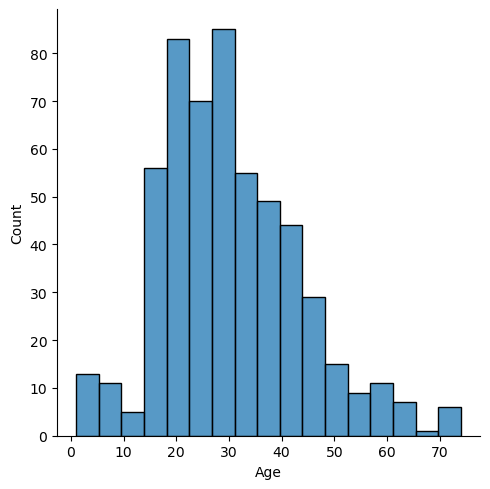

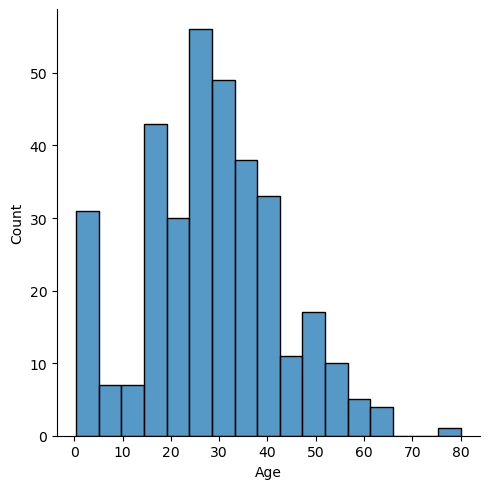

In [22]:
sns.displot(df['Age'][df['Survived']==0])
sns.displot(df['Age'][df['Survived']==1])

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
df.drop(columns=['Ticket'],inplace=True)

In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [26]:
df['family']=df['SibSp']+df['Parch']+1

In [27]:
df['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [28]:
df.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [29]:
def cal(number):
    if number==1:
        return 'Alone'
    elif number>1 and number<5:
        return 'Large'

In [30]:
df['family_size']=df['family'].apply(cal)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Large
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Large
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Large
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [32]:
df.drop(columns=['SibSp','Parch','family'],inplace=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Large
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Large
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Large
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Alone


In [34]:
#passengerid=df['PassengerId']=df['PassengerId'].values

In [35]:
df.drop(columns=['Name','PassengerId'],inplace=True)

In [36]:
df.shape

(891, 7)

In [37]:
df=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [38]:
df.shape

(891, 9)

In [39]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large
0,0,22.0,7.2500,False,True,True,False,True,True
1,1,38.0,71.2833,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,False,True,False
3,1,35.0,53.1000,False,False,False,False,True,True
4,0,35.0,8.0500,False,True,True,False,True,False


In [40]:
df.replace({False: 0, True: 1}, inplace=True)

In [41]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large
0,0,22.0,7.2500,0,1,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,1
4,0,35.0,8.0500,0,1,1,0,1,0


In [42]:
x=df.iloc[:,1:].values
y=df.iloc[:,0:].values

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [44]:
x

array([[22.    ,  7.25  ,  0.    , ...,  0.    ,  1.    ,  1.    ],
       [38.    , 71.2833,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [26.    ,  7.925 ,  0.    , ...,  0.    ,  1.    ,  0.    ],
       ...,
       [30.    , 23.45  ,  0.    , ...,  0.    ,  1.    ,  1.    ],
       [26.    , 30.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [32.    ,  7.75  ,  0.    , ...,  1.    ,  0.    ,  0.    ]])

In [45]:
y

array([[ 0.    , 22.    ,  7.25  , ...,  0.    ,  1.    ,  1.    ],
       [ 1.    , 38.    , 71.2833, ...,  0.    ,  0.    ,  1.    ],
       [ 1.    , 26.    ,  7.925 , ...,  0.    ,  1.    ,  0.    ],
       ...,
       [ 0.    , 30.    , 23.45  , ...,  0.    ,  1.    ,  1.    ],
       [ 1.    , 26.    , 30.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    , 32.    ,  7.75  , ...,  1.    ,  0.    ,  0.    ]])

In [46]:
x_train

array([[ 40.    ,  27.7208,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  4.    ,  16.7   ,   0.    , ...,   0.    ,   1.    ,   1.    ],
       [ 47.    ,   9.    ,   0.    , ...,   0.    ,   1.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [ 22.    , 221.7792,   0.    , ...,   0.    ,   1.    ,   0.    ],
       [ 26.    ,  25.925 ,   0.    , ...,   0.    ,   1.    ,   0.    ]])

In [47]:
y_train.shape

(712, 9)

In [48]:
x_test.shape

(179, 8)

In [49]:
y_test.shape

(179, 9)

In [50]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large
0,0,22.0,7.2500,0,1,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,1
4,0,35.0,8.0500,0,1,1,0,1,0


In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [52]:
le=LabelEncoder()
df['Fare']=le.fit_transform(df['Fare'])
df['Survived']=le.fit_transform(df['Survived'])
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large
0,0,22.0,18,0,1,1,0,1,1
1,1,38.0,207,0,0,0,0,0,1
2,1,26.0,41,0,1,0,0,1,0
3,1,35.0,189,0,0,0,0,1,1
4,0,35.0,43,0,1,1,0,1,0


In [53]:
x=df.drop('Survived',axis=1)
y=df['Survived']
x.head()


,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large
0,22.0,18,0,1,1,0,1,1
1,38.0,207,0,0,0,0,0,1
2,26.0,41,0,1,0,0,1,0
3,35.0,189,0,0,0,0,1,1
4,35.0,43,0,1,1,0,1,0


In [54]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [56]:
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [57]:
dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [58]:
y_train_pred=dtr.predict(x_train)
y_test_pred=dtr.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
r2_score(y_train,y_train_pred)*100

97.13332302618016

In [60]:
r2_score(y_test,y_test_pred)*100

-6.1112067481494226

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [62]:
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
r2_score(y_train,y_train_pred)*100

89.81211246278995

In [63]:
r2_score(y_test,y_test_pred)*100

33.70386167744503

In [64]:
mse=mean_squared_error(y_test,y_test_pred)
print(mse)

0.16085748531788335


In [65]:
rmse=sqrt(mse)
print(rmse)

0.4010704243868941


In [66]:
mean_squared_error(y_train,y_train_pred)

0.02376873648373207

In [67]:
mean_absolute_error(y_test,y_test_pred)

0.2650240760483298